In [1]:
# import the libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def no_of_boxes_in_image(image):
     
    # Loading an color image in grayscale
    img = cv2.imread(image, 0)

    # Thresholding the image
    thresh, img_bin = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Invert the image
    img_bin = 255 - img_bin 

    # using coutours area filteraion to remove small noises
    coutours = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    

    for coutour in coutours:
        coutour_area = cv2.contourArea(coutour)
        if coutour_area < 150:
            cv2.drawContours(img_bin, [coutour], -1, 0, -1)


    # locating the corners of boxes
    corners = cv2.goodFeaturesToTrack(img_bin,150,0.01,5)
    for corner in corners:
        x,y = corner.ravel()
        cv2.circle(img,(x,y),5,(130,255,255),-1)

    no_of_boxes = int(len(corners) / 4)


    return img_bin, img, no_of_boxes


no_of_boxes : 4


(-0.5, 227.5, 182.5, -0.5)

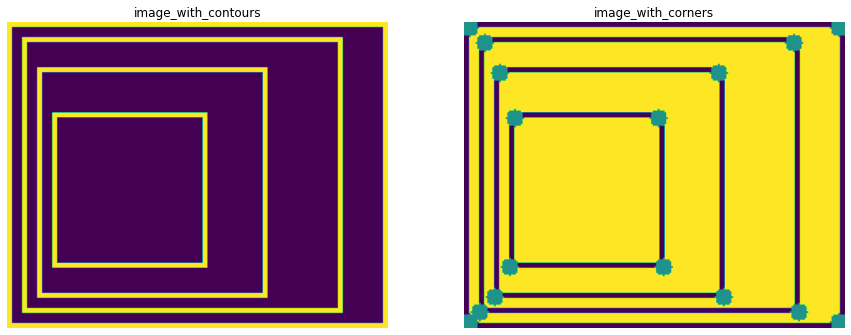

In [3]:
image_path  = 'Vision1/boxes' + str(1) + '.jpg'
img_bin, img, no_of_boxes = no_of_boxes_in_image(image_path)
print("no_of_boxes : " + str(no_of_boxes))

fig = plt.figure(figsize=(15, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img_bin)
plt.title("image_with_contours")
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("image_with_corners")
plt.axis("off")

no_of_boxes : 16


(-0.5, 1187.5, 593.5, -0.5)

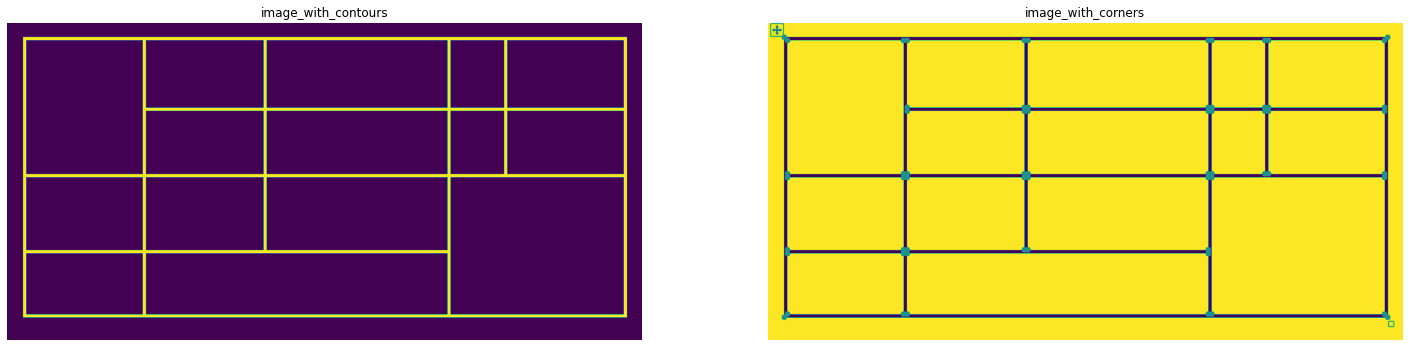

In [4]:
image_path  = 'Vision1/boxes' + str(2) + '.jpg'
img_bin, img, no_of_boxes = no_of_boxes_in_image(image_path)
print("no_of_boxes : " + str(no_of_boxes))

fig = plt.figure(figsize=(25, 15))

fig.add_subplot(1, 2, 1)
plt.imshow(img_bin)
plt.title("image_with_contours")
plt.axis("off")

fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("image_with_corners")
plt.axis("off")